In [1]:
from PySections import *

<h1>Cable Pretensado</h1>

In [23]:
estructura = Estructura()

concreto = Material('CONCRETO', 1, 0.2, 9.9*10**-6, 23.54)
seccion = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [315840,7814000], concreto)
seccion2 = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [9*10**9,1*10**-9], concreto)

estructura.agregarNodo(x=0, y=1.55, fix=[False,False,False])
estructura.agregarNodo(x=17, y=1.55, fix=[False,True,False])
estructura.agregarNodo(x=17, y=0, fix=[False,True,False])


estructura.agregarElemento(seccion=seccion, nodoInicial=0, nodoFinal=1, tipo=Tipo.DOS)
estructura.agregarElemento(seccion=seccion, nodoInicial=0, nodoFinal=2, tipo=Tipo.CUATRO)
estructura.agregarElemento(seccion=seccion2, nodoInicial=1, nodoFinal=2, tipo=Tipo.UNO)


estructura.agregarCargaElemento(elemento=0, wy=32)


error = 1
sup = 6455.939
inf = 0
defl = 0.005
for i in range(0,100):
    xr = (sup + inf)/2
    estructura.agregarCargaPresfuerzoAxial(elemento=1, q0=sup, remplazar=True)
    estructura.solucionar(verbose=False)
    fxsup = estructura.Ul[0]-defl
    estructura.agregarCargaPresfuerzoAxial(elemento=1, q0=inf, remplazar=True)
    estructura.solucionar(verbose=False)
    fxinf = estructura.Ul[0]-defl
    estructura.agregarCargaPresfuerzoAxial(elemento=1, q0=xr, remplazar=True)
    estructura.solucionar(verbose=False)
    fxr = estructura.Ul[0]-defl
    if fxr*fxsup <0:
        inf = xr
    else:
        sup = xr
print('El valor de la carga para que la deflexion sea ' + format(defl) + ' es de ' + format(xr))
estructura.pintar()
estructura.guardarResultados('Resultados')

El valor de la carga para que la deflexion sea 0.005 es de 4015.644231022121
Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/Resultados 


<h1>Problema 5</h1>

In [5]:
estructura2 = Estructura()
ACERO = Material('ASTM A9922', 200000000, 0.3, 1.17*10**-5, 76.9729)
abed = Seccion('ELEMENTOS AB & ED', TipoSeccion.GENERAL, [(7.55*10**3)/(1000**2),(1.28*10**8)/(1000**4)], ACERO)
h1 = 0.33
bccd = Seccion('ELEMENTOS AB & ED', TipoSeccion.GENERAL, [(6.65*10**3)/(1000**2),(2.12*10**8)/(1000**4)], ACERO)
h2 = 0.45

interior = -15
exterior = 45

inicial = 25

estructura2.agregarNodo(x=0, y=0, fix=[False,False,False])

estructura2.agregarNodo(x=0, y=4)
estructura2.agregarNodo(x=5.5*np.cos(30/180*np.pi), y=4+5.5*np.sin(30/180*np.pi))
estructura2.agregarNodo(x=5.5*np.cos(30/180*np.pi)+5, y=4+5.5*np.sin(30/180*np.pi))

estructura2.agregarNodo(x=5.5*np.cos(30/180*np.pi)+5, y=5.5*np.sin(30/180*np.pi), fix=[False,False,False])

estructura2.agregarElemento(seccion=abed, nodoInicial=0, nodoFinal=1, tipo=Tipo.UNO)
estructura2.agregarElemento(seccion=bccd, nodoInicial=1, nodoFinal=2, tipo=Tipo.UNO)
estructura2.agregarElemento(seccion=bccd, nodoInicial=2, nodoFinal=3, tipo=Tipo.TRES)
estructura2.agregarElemento(seccion=abed, nodoInicial=4, nodoFinal=3, tipo=Tipo.DOS)

estructura2.definirCambiosTemperatura(0,inicial,interior,exterior,h1)
estructura2.definirCambiosTemperatura(1,inicial,interior,exterior,h2)
estructura2.definirCambiosTemperatura(2,inicial,interior,exterior,h2)
estructura2.definirCambiosTemperatura(3,inicial,interior,exterior,-h1)

estructura2.solucionar(verbose=True,dibujar=True)

Se ha terminado de calcular, puedes examinar la variable de la estructura para consultar los resultados.


<h1>Problema 6</h1>

In [ ]:
from PySections import *
estructura3 = Estructura()

CONCRETO = Material('CONCRETO', 20000000, 0.2, 9.9*10**-6, 23.54)
ACERO = Material('CONCRETO', 1, 0.2, 9.9*10**-6, 23.54)
VIGA = Seccion('ELEMENTOS', TipoSeccion.RECTANGULAR, [0.3,0.45], CONCRETO)
CABLE = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [1*10**(-10),1], ACERO)

estructura3.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura3.agregarNodo(x=7.5,y=0)
estructura3.agregarNodo(x=2*7.5,y=0,fix=[True,False,True])
estructura3.agregarNodo(x=0,y=6,fix=[False,False,False])

estructura3.agregarElemento(seccion=VIGA, nodoInicial=0, nodoFinal=1, tipo=Tipo.UNO)
estructura3.agregarElemento(seccion=VIGA, nodoInicial=1, nodoFinal=2, tipo=Tipo.UNO)
estructura3.agregarElemento(seccion=CABLE, nodoInicial=3, nodoFinal=1, tipo=Tipo.CUATRO)


estructura3.agregarCargaDistribuida(elemento=0, WY=75)
estructura3.agregarCargaDistribuida(elemento=1, WY=75)

estructura3.agregarResorte(nodo=2, rigidez=[10000,0,0])


error = 1
sup = 6455.939
inf = 0
defl = 0
for i in range(0,100):
    xr = (sup + inf)/2
    estructura3.agregarCargaPresfuerzoAxial(elemento=2, q0=sup, remplazar=True)
    estructura3.solucionar(verbose=False)
    fxsup = estructura3.Ul[1]-defl
    estructura3.agregarCargaPresfuerzoAxial(elemento=2, q0=inf, remplazar=True)
    estructura3.solucionar(verbose=False)
    fxinf = estructura3.Ul[1]-defl
    estructura3.agregarCargaPresfuerzoAxial(elemento=2, q0=xr, remplazar=True)
    estructura3.solucionar(verbose=False)
    fxr = estructura3.Ul[1]-defl
    if fxr*fxsup <0:
        inf = xr
    else:
        sup = xr
print('El valor de la carga para que la deflexion sea ' + format(defl) + ' es de ' + format(xr))
print('El valor de la carga en el gato es ' + format(estructura3.elementos[2].p[0][0]))
estructura3.pintar()

156.25 -78.10108662381425


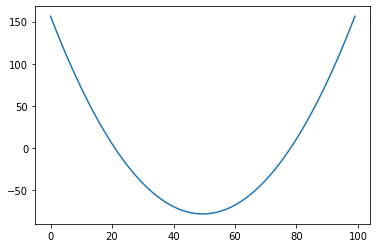

In [2]:
from PySections import *
import matplotlib.pyplot as plt
estructura = Estructura()

CONCRETO = Material('CONCRETO', 20000000, 0.2, 9.9*10**-6, 23.54)
VIGA = Seccion('ELEMENTOS', TipoSeccion.RECTANGULAR, [0.3,0.45], CONCRETO)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=5,y=0,fix=[False,False,False])
estructura.agregarElemento(seccion=VIGA, nodoInicial=0, nodoFinal=1, tipo=Tipo.UNO)
estructura.agregarCargaDistribuida(elemento=0, WY=75)
estructura.solucionar(verbose=False)
estructura.elementos[0].solucionarFEM(lambda x: -75,n=100)
plt.plot(estructura.elementos[0].DMomentos)
print(np.max(estructura.elementos[0].DMomentos),np.min(estructura.elementos[0].DMomentos))
#estructura.elementos[0].cargasDistribuidas

In [3]:
estructura.elementos[0].p

array([[   0.  ],
       [ 187.5 ],
       [ 156.25],
       [   0.  ],
       [ 187.5 ],
       [-156.25]])

In [1]:
from PySections import *
CONCRETO = Material('CONCRETO', 20000000, 0.2, 9.9*10**-6, 23.54)
uyt = Seccion('ELEMENTOS1y3', TipoSeccion.GENERAL, [1.5,0.3], CONCRETO)
dos = Seccion('ELEMENTO2', TipoSeccion.GENERAL, [1.45,0.25], CONCRETO)

In [2]:
estructura = Estructura()

estructura.agregarNodo(x=0,y=5.85)
estructura.agregarNodo(x=15.5,y=5.85)
estructura.agregarNodo(fix=[False, False, False],x=0,y=0)
estructura.agregarNodo(fix=[False, False, False],x=15.5,y=0)

estructura.agregarElemento(seccion=uyt, nodoInicial=2, nodoFinal=0, tipo=Tipo.UNO)
estructura.agregarElemento(seccion=dos, nodoInicial=0, nodoFinal=1, tipo=Tipo.UNO)
estructura.agregarElemento(seccion=uyt, nodoInicial=3, nodoFinal=1, tipo=Tipo.UNO)

estructura.agregarResorte(nodo=1,rigidez=[5000,0,0])
estructura.agregarResorte(nodo=0,rigidez=[5000,0,0])

estructura.agregarCargaNodo(nodo=0, px=3400, py=-3900, m=6500)
estructura.agregarCargaNodo(nodo=1, px=3400, py=-3900, m=-6500)

estructura.agregarCargaElemento(elemento=1, ftercios=1950)

estructura.definirDesplazamientoRestringido(nodo=2, gdl=0, valor=-0.04)
estructura.solucionar(True,True)

Se ha terminado de calcular, puedes examinar la variable de la estructura para consultar los resultados.
